In [1]:
from astropy.cosmology import Planck13
import pandas as pd
import numpy as np
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import disperse
from tqdm import tqdm

In [2]:
coma_ra_int = (130, 260)
coma_dec_int = (-10, 70)
coma_z_int = (0.00545, 0.04135)

In [3]:
cosmo = Planck13

In [4]:
H0 = cosmo.H0.value
Om = cosmo.Om0
Ol = 0.69288
Ok = 0.0

In [5]:
print(f'H0 = {cosmo.H0.value}')
print(f'Om = {cosmo.Om0}')
print(f'Ol = {0.69288}')

H0 = 67.77
Om = 0.30712
Ol = 0.69288


In [6]:
# df = pd.DataFrame()
# n_gal, ra, dec, z, r_max, m200, r200 = [], [], [], [], [], [], [] 
# with open('SDSS/SDSS_DR12_optical_groups.dat') as f:
#     for line in f:
#         s = line.split()
#         n_gal.append(int(s[1]))
#         ra.append(float(s[2]))
#         dec.append(float(s[3]))
#         z.append(float(s[9]))
#         r_max.append(float(s[13]))
#         m200.append(float(s[14]))
#         r200.append(float(s[15]))
# df = df.assign(n_gal=n_gal)
# df = df.assign(RA=ra)
# df = df.assign(DEC=dec)
# df = df.assign(Z=z)
# df = df.assign(r_max=r_max)
# df = df.assign(M200=m200)
# df = df.assign(R200=r200)
# df = df[
#         (coma_ra_int[0] <= df['RA']) & (df['RA'] <= coma_ra_int[1]) & \
#         (coma_dec_int[0] <= df['DEC']) & (df['DEC'] <=coma_dec_int[1]) & \
#         (coma_z_int[0] <= df['Z']) & (df['Z'] <= coma_z_int[1])
#     ]
# df.to_csv('sdss_opt_gr_filtered_RaDecZ.csv', index=False)

In [7]:
# df = pd.DataFrame()
# ra, dec, z = [], [], []
# with open('SDSS/SDSS_DR12_MGS.dat') as f:
#     for line in f:
#         s = line.split()
#         ra.append(float(s[12]))
#         dec.append(float(s[13]))
#         z.append(float(s[8]))
# df = df.assign(RA=ra)
# df = df.assign(DEC=dec)
# df = df.assign(Z=z)
# df = df[
#         (coma_ra_int[0] <= df['RA']) & (df['RA'] <= coma_ra_int[1]) & \
#         (coma_dec_int[0] <= df['DEC']) & (df['DEC'] <=coma_dec_int[1]) & \
#         (coma_z_int[0] <= df['Z']) & (df['Z'] <= coma_z_int[1])
#     ]
# df.to_csv('coma_DR12_filtered_RaDecZ.csv', index=False)

In [8]:
coma_DR7 = pd.read_csv('coma_DR7_filtered_RaDecZ.csv')
coma_DR12 = pd.read_csv('coma_DR12_filtered_RaDecZ.csv')
rosat = pd.read_csv('rosat_filtered_RaDecZ.csv')
sdss_opt_gr = pd.read_csv('sdss_opt_gr_filtered_RaDecZ.csv')
sdss_opt_gr = sdss_opt_gr[sdss_opt_gr['n_gal'] >= 15]
sdss_opt_gr.reset_index(drop=True, inplace=True)



In [9]:
# coma

In [10]:
sdss_opt_gr

,n_gal,RA,DEC,Z,r_max,M200,R200
0,180,246.942018,39.401823,0.031119,1.720684,635.8440,1.794430
1,83,247.581739,39.778534,0.028910,1.040201,221.2070,1.262930
2,101,246.935701,40.923333,0.031285,1.363890,307.1370,1.407870
3,85,247.491124,40.610586,0.029515,1.029668,147.2880,1.102600
4,34,246.010700,41.010818,0.030111,1.035922,135.6380,1.072530
...,...,...,...,...,...,...,...
217,22,247.144612,8.529292,0.032348,0.760295,54.8312,0.792467
218,22,179.565240,25.119524,0.015661,0.424296,18.0177,0.549744
219,32,211.719008,55.039101,0.006525,0.544485,19.9125,0.569996
220,15,165.703588,50.720856,0.022642,0.463985,12.5296,0.485982


In [11]:
sph2cart = 'dist'
in_cart_coords = True

In [12]:
DPS = disperse.Disperse3D(
    coma_DR12, sdss_opt_gr, '_disperse_03/bin/',
    H0, Om, Ol, Ok,
    sph2cart_f=sph2cart
)

In [13]:
DPS.count_cart_coords()

In [14]:
CX = DPS.clusters['CX']
CY = DPS.clusters['CY']
CZ = DPS.clusters['CZ']

CX_int = (CX.min(), CX.max())
CY_int = (CY.min(), CY.max())
CZ_int = (CZ.min(), CZ.max())

np.random.seed(0)

random_clusters_num = 5
random_clusters = []
for i in range(random_clusters_num):
    cx = np.random.uniform(CX_int[0], CX_int[1], DPS.clusters.shape[0])
    cy = np.random.uniform(CY_int[0], CY_int[1], DPS.clusters.shape[0])
    cz = np.random.uniform(CZ_int[0], CZ_int[1], DPS.clusters.shape[0])
    df = pd.DataFrame()
    df = df.assign(CX=cx)
    df = df.assign(CY=cy)
    df = df.assign(CZ=cz)
    ra, dec, z = DPS.cart2shp_ASTROPY(cx, cy, cz)
    df = df.assign(RA=ra)
    df = df.assign(DEC=dec)
    df = df.assign(Z=z)
    df = df.assign(R200=DPS.clusters['R200'])
    random_clusters.append(df)

In [15]:
SIGMA = 5
SMOOTH = 1
BOARD = 'smooth'
ANGLE = 30

In [16]:
DPS.apply_disperse(SIGMA, SMOOTH, BOARD, ANGLE, in_cart_coords)

In [21]:
cl_conn, cl_maxmap, \
fils_conn, maxs_maxmap, \
count_fils, count_maxs = DPS.count_conn_maxmap(
    sdss_opt_gr['R200'] * 5,
    sdss_opt_gr['R200'] * 5,
    random_clusters[1]
)

AxesSubplot(0.125,0.125;0.775x0.755)


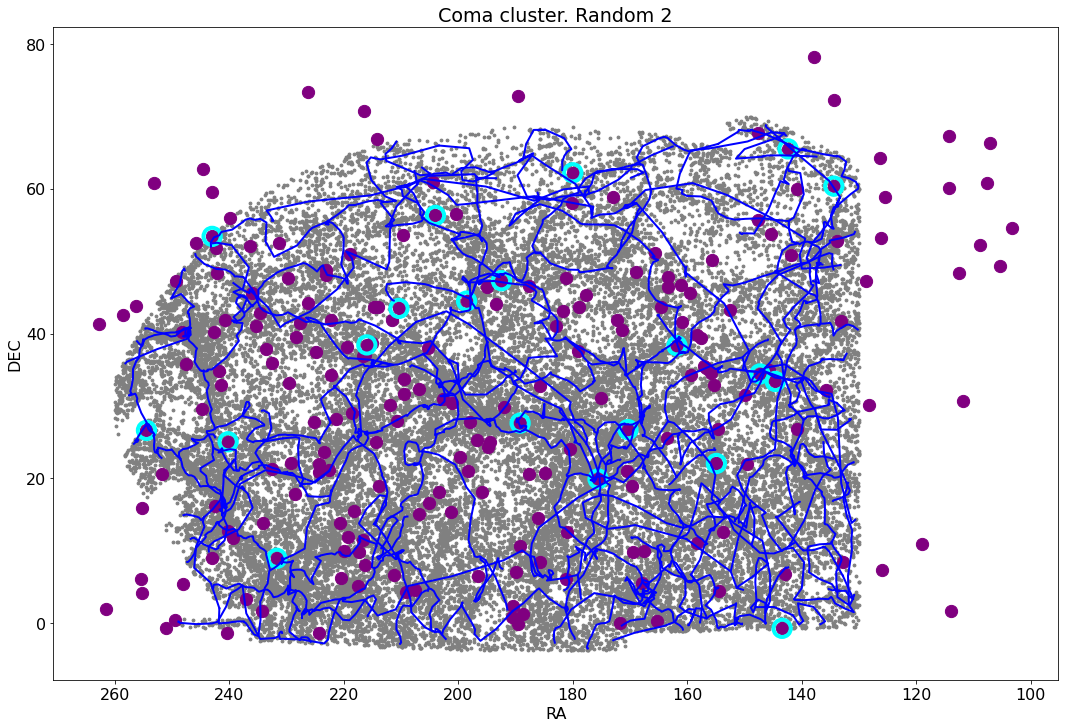

In [24]:
%matplotlib inline
fig, title = DPS.plot_2d(
    plot_cps=False, plot_only_max=False,
#     plot_fils=False, 
    title='Coma cluster. Random 2',
    cl_fils=list(map(lambda x: x>0, cl_conn)),
#     cl_maxs=list(map(lambda x: x>0, cl_maxmap))
    clusters=random_clusters[1]
)
plt.savefig(title + '2D.jpg')

100%|██████████| 258/258 [00:00<00:00, 1943.09it/s]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
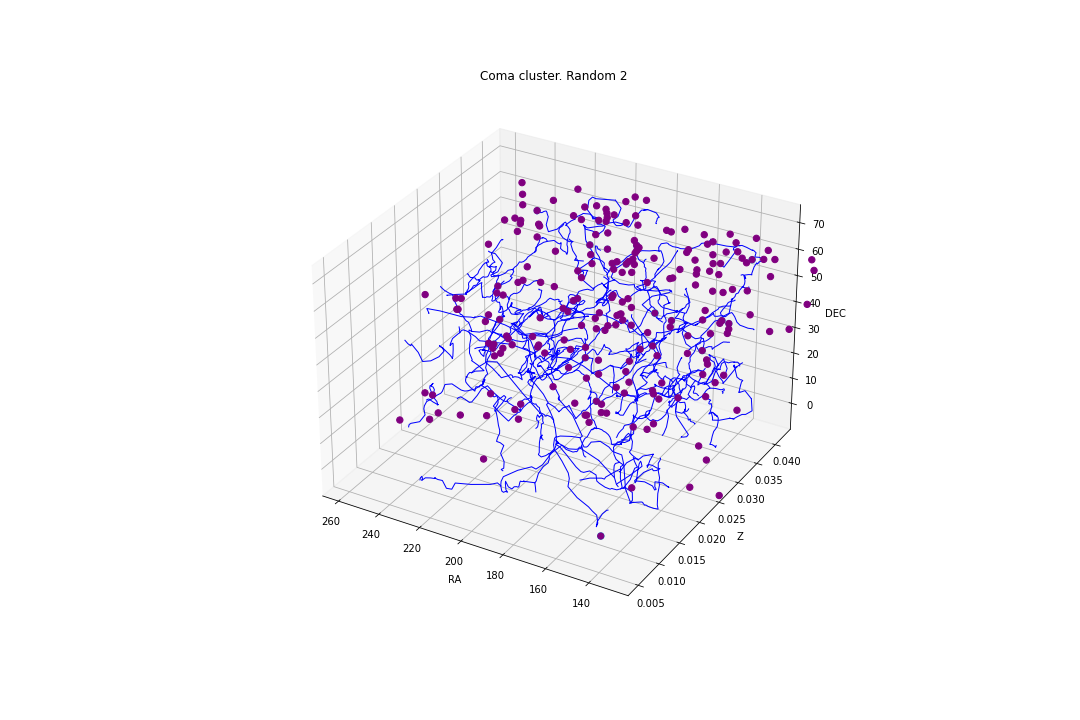

In [25]:
%matplotlib widget
fig, title = DPS.plot_3d(
    plot_cps=False, plot_only_max=False,
#     plot_fils=False, 
    title='Coma cluster. Random 2',
    cl_fils=list(map(lambda x: x>0, cl_conn)),
#     cl_maxs=list(map(lambda x: x>0, cl_maxmap))
    clusters=random_clusters[1]
)
plt.savefig(title + '3D.jpg')

In [ ]:
# q1_conns = []
# for i in np.arange(1, 5.5, 0.5):
#     q1_conns.append(
#         t[t['n_gal'] <= q1][f'CONN_COEF_{i}'].astype(bool).sum()
#     )
# q1_conns, t[t['n_gal'] <= q1].shape[0]

In [ ]:
# q2_conns = []
# for i in np.arange(1, 5.5, 0.5):
#     q1_conns.append(
#         t[(t['n_gal'] >= q1) & (t['n_gal'] <= q2)][f'CONN_COEF_{i}'].astype(bool).sum()
#     )
# q2_conns, t[(t['n_gal'] >= q1) & (t['n_gal'] <= q2)].shape[0]

In [ ]:
# q3_conns = []
# for i in np.arange(1, 5.5, 0.5):
#     q1_conns.append(
#         t[(t['n_gal'] >= q2) & (t['n_gal'] <= q3)][f'CONN_COEF_{i}'].astype(bool).sum()
#     )
# q3_conns, t[(t['n_gal'] >= q2) & (t['n_gal'] <= q3)].shape[0]

In [ ]:
# q4_conns = []
# for i in np.arange(1, 5.5, 0.5):
#     q1_conns.append(
#         t[(t['n_gal'] >= q3)][f'CONN_COEF_{i}'].astype(bool).sum()
#     )
# q4_conns, t[(t['n_gal'] >= q3)].shape[0]